In [53]:
import numpy as np
import math
from scipy.linalg import expm

In [54]:
import numpy as np

# If P is a square row-stochastic matrix, returns the 
# normalized (sum 1) eigenvector associated with the 
# unit eigenvalue.
#
# For Markov chains with state transition probability 
# matrix P, this vector gives the steady state 
# distribution over the states.
#
# If P does not have a unit eigenvalue, returns None.
# However, sensible results are not guaranteed for
# arbitrary matrices.

def getSteadyStateDist(P):
    
    tolerance = 1e-10
    
    # need the left eigenvectors
    [u,v] = np.linalg.eig(np.transpose(P))
    v = np.transpose(v)
    
    index = 0
    for i in u:
        if np.abs(i - 1.) < tolerance:
            return np.real(v[index,:] / np.sum(v[index,:]))
        index += 1
        
    return None 

In [55]:
#method definition for transition matrix P and trajectory probabilities
import numpy as np
import math
from scipy.linalg import expm

def transitionmatrix(xt,xt2,deltat,q12,r23,r31,alpha,beta,i):
    q12x1=xt*q12
    q23=r23+(alpha*i)
    q31=(r31+(beta*i))*xt2
    
    R1=-1*q12x1
    R2 = -1*q23
    R3 = -1*q31
    Q=np.zeros((2,2))
    
    Q = np.array([[R1, q12x1],
                  [q31, R3]])
    I=np.eye(2)
    #P= I + (deltat*Q)
    P=expm(deltat*Q)
    return P
def trajprob(P,steadystate,pb):
    
    T=np.array([P[:,0],P[:,1],P[:,2]])
#T0=np.array([P0[:,0],P0[:,1],P0[:,2]])


    rows=len(T)
    cols=len(P[0])
    index=0
    for i in range(rows):
        j=0
        while(j<=(cols-1)):
            #pb0[index,:]= steadystate[i]*((P0[i,j]*T0[:,j]))
            pb[index,:]= steadystate[i]*((P[i,j]*T[:,j]))
            j=j+1
            index=index+1

    pbcol= np.array([pb]).reshape(27,1)
    return pbcol   

def pbx1givenseq(pbseqgivenx1,pbseqgivenx0,px1,px0):
    
    totalprob=(pbseqgivenx1*px1)+(pbseqgivenx0*px0)
    pbx1giventraj=(pbseqgivenx1 *px1)/totalprob
    return pbx1giventraj

def pbx0givenseq(pbseqgivenx1,pbseqgivenx0,px1,px0):    
   
    totalprob=(pbseqgivenx1*px1)+(pbseqgivenx0*px0)
    pbx0giventraj=(pbseqgivenx0 *px0)/totalprob
    return pbx0giventraj

In [56]:
def randomwalk(start_state,xtd1,xt2,deltat1,nstate,q12,r23,r31,alpha,beta,i):
    state = {
    0: "C",
    1: "O"
    #2: "O"
   }
    xtd=xtd1
    deltat=deltat1
    A=transitionmatrix(xtd,xt2,deltat,q12,r23,r31,alpha,beta,i)
    sequenced=[]
    for i in range(1):
    
        n = nstate
        
        curr_state = start_state
        currentstatelist=[state[curr_state]]
        #print(state[curr_state], "->", end=" ")

        while n-1:
            curr_state = np.random.choice([0, 1], p=A[curr_state])
            #print(state[curr_state], "->", end=" ")
            currentstatelist.append(state[curr_state])
            n-=1
        #print("stop")
        #sequenced.append(currentstatelist)
    return currentstatelist  

In [78]:
#variable wait time/total time (data rate) vs probability of error
import statistics as st

#totaltime=np.linspace(15e-3,200e-3,100)

totaltime = np.arange(0,120e-3,20e-3)
#nsimulations = 100
#pbxt=[]
#pb=np.zeros((len(totaltime),nsimulations))
#ttime=np.zeros((len(totaltime),nsimulations))
q12 = 0.2
#q12=5e3
r23 = 0
r31=0.00370
#r31=17
alpha=0
beta= 0.08
tx_interval=20

inputbits=10
data= np.array([0,0,1,1,0])
#tmax=1000
#time1 = np.arange(0, tmax, dt)
i=0
timechunks=[]
dt=.01
currentstate='C'
statet = {
          "C":0,
          "O":1,
          #"D":2
        }
index=0
while(i<100):
    timechunks.append(np.arange(i,(i+20),dt))
    i=i+20

Vm1=[]
Ic=[]
t=0
print(len(totaltime))
k=0

#data=np.random.randint(0,2,inputbits)
#Ic[0,k:t]=np.array([1,2,3,4,5,6,7,8,9,10])
#print(Vm)
rxseq=[]
while(t < (len(data))):
    #star=totaltime[t]
    #end= totaltime[t+1]
    databit=data[t]
    if(databit==0):
        nst=2
        xtd=100
        xct=0
        deltat=0.01
        waittime=(nst-1)*deltat
        #rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
        #currentstate=rxseq[index][1]
        while (True):
            rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
            currentstate=rxseq[index][1]
            if(rxseq[-1]==['C','O'] or rxseq[-1]==['O','O']):
                print(rxseq[-1])
                break
        if(t>0 and data[t-1]==0):
            #print(rxseq[-1])
            lastvaluevc=v[-1]
            lastvalueic=ic[-1]
            array_lastvalue=np.full(len(v),lastvaluevc)
            array_lastvaluei=np.full(len(ic),lastvalueic)
            Vm1.append(array_lastvalue)
            Ic.append(array_lastvaluei)
        else:
           # print(rxseq[-1])
            v,ic=charging_membrane()
            Vm1.append(v)
            Ic.append(ic)
    else:
        nst=2
        xtd=0
        xct=100
        deltat=0.01
        waittime=(nst-1)*deltat
        while (True):
            rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
            currentstate=rxseq[index][1]
            if(rxseq[-1]==['C','C'] or rxseq[-1]==['O','C']):
                print(rxseq[-1])
                break
                        
        if(t>0 and data[t-1]==1):
            #print(rxseq[-1])
            lastvaluevc=v[-1]
            lastvalueic=ic[-1]
            array_lastvalue=np.full(len(v),lastvaluevc)
            array_lastvaluei=np.full(len(ic),lastvalueic)
            Vm1.append(array_lastvalue)
            Ic.append(array_lastvaluei)
        else:
            #print(rxseq[-1])
            v,ic = discharging_membrane()
            #Vm.append(discharging_membrane())
            Vm1.append(v)
            Ic.append(ic)
    
    t=t+1
    #k=k+20000
    
#t=3
#star=totaltime[t]
#end= totaltime[t+1]
#ttest = np.linspace(star, end, 20)
#ttest1 = np.arange(star, end, dt)
#print(star)
#print(end)
#print(ttest)
#print(ttest1)
#k=0
#Ic[0,k:k+20]=ttest
#k=k+20

#print(Vm)
#print(star)
#print(end)
#print(len(Vm))

6
['C', 'O']
['O', 'O']
['O', 'C']
['O', 'C']
['O', 'O']


In [43]:
rxseq=[]
index=0
q12 = 0.2
#q12=5e3
r23 = 0
r31=0.00370
#r31=17
alpha=0
beta= 0.08
currentstate='C'
statet = {
          "C":0,
          "O":1,
          #"D":2
        }
nst=2
xtd=100
xct=0
deltat=0.01
waittime=(nst-1)*deltat
rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
currentstate=rxseq[index][1]
while (True):
    rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
    currentstate=rxseq[index][1]
    if(rxseq[-1]==['C','O'] or rxseq[-1]==['O','O']):
        print(rxseq[-1])
        break
print("condition met")   
    #rxseq.append(randomwalk(statet[currentstate],xtd,xct,deltat,nst,q12,r23,r31,alpha,beta,1))
    #currentstate=rxseq[index][1]

['O', 'O']
condition met


In [ ]:
test=0
s=0
while(test<5):
    if(s==3):
        break
    s=s+1
    print("something")
    test=test+1

In [ ]:
Vm=[]
Ic=[]
data= np.array([1,1,1,0,1])
for d in range(len(data)):
    if(databit==1):
        if(d>0 and data[d-1]==1):
            lastvaluevc=Vm[-1]
            lastvalueic=Ic[-1]
            array_lastvalue=np.full(len(v),lastvaluevc)
            Vm.append(array_lastvalue)
            print(Vm[-1])
            print(v[-1])
        else:
            v,ic=charging_membrane()
            Vm.append(v)
            Ic.append(ic)
            print(Vm[-1])
            print(v[-1])
    else:
        v,ic = discharging_membrane()
        #Vm.append(discharging_membrane())
        Vm.append(v)
        Ic.append(ic)
        print(Vm[-1])
        print(v[-1])

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def charging_membrane():
    
    # Define parameters
    C_m = 1.0  # Membrane capacitance in uF/cm^2
    R_m = 1.0  # Membrane resistance in kΩ·cm^2 (inverse of conductance)
    V_rest = -70  # Resting membrane potential in mV
    V_final = 50.0  # Final membrane potential after charging in mV

    # Time parameters
    dt = 0.01  # Time step in ms
    t_max = 20  # Total time in ms
    time = np.arange(0, t_max, dt)

    # Initialize membrane potential
    V_m = np.zeros_like(time)
    V_m[0] = V_rest

    # Calculate the time constant tau
    tau = R_m * C_m  # in ms

    # Simulate the charging membrane potential
    for i in range(1, len(time)):
        V_m[i] = V_rest + (V_final - V_rest) * (1 - np.exp(-time[i] / tau))

    # Calculate capacitive current I_C = C_m * dV_m/dt
    I_C = np.zeros_like(time)
    for i in range(1, len(time)):
        I_C[i] = C_m * (V_m[i] - V_m[i-1]) / dt
    #print(V_m)
    return V_m,I_C


In [ ]:
charging_membrane()
s,si= charging_membrane()

In [ ]:
s[-1]

In [ ]:
lastvaluevc=v[-1]
array_lastvalue=np.full(len(v),lastvaluevc)
print(array_lastvalue)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def discharging_membrane():
    
    # Define parameters
    C_m = 1.0  # Membrane capacitance in uF/cm^2
    R_m = 1.0  # Membrane resistance in kΩ·cm^2 (inverse of conductance)
    V_0 = 50.0  # Initial membrane potential in mV
    V_rest = -70  # Resting membrane potential in mV

    # Time parameters
    dt = 0.01  # Time step in ms
    t_max = 20  # Total time in ms
    time = np.arange(0, t_max, dt)

    # Initialize membrane potential
    V_m = np.zeros_like(time)
    V_m[0] = V_0

    # Calculate the time constant tau
    tau = R_m * C_m  # in ms

    # Simulate the decaying membrane potential
    for i in range(1, len(time)):
        V_m[i] = V_rest + (V_0 - V_rest) * np.exp(-time[i] / tau)

    # Calculate capacitive current I_C = C_m * dV_m/dt
    I_C = np.zeros_like(time)
    for i in range(1, len(time)):
        I_C[i] = C_m * (V_m[i] - V_m[i-1]) / dt
    #print(len(I_C))
    return V_m,I_C



In [ ]:
charging_membrane()

In [ ]:
discharging_membrane()

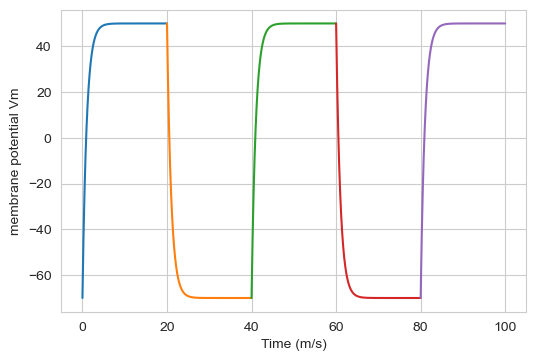

In [76]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import seaborn as sns

sns.set_style("whitegrid")

fig1,ax1=plt.subplots(dpi=100)
#fig2,ax2=plt.subplots(dpi=100)
ax1.set_ylabel("membrane potential Vm")
ax1.set_xlabel('Time (m/s)')

for j in range(len(timechunks)):
    ax1.plot(timechunks[j],Vm[j])
    #ax2.plot(timechunks[j],Ic[j])

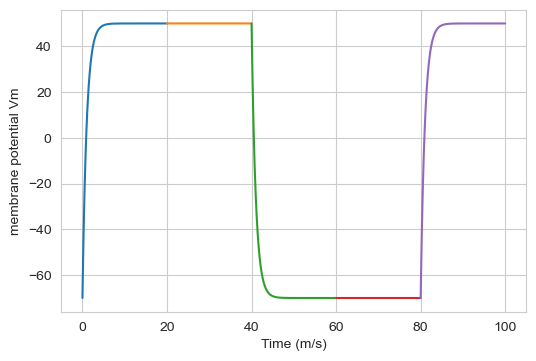

In [79]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import seaborn as sns

sns.set_style("whitegrid")

fig1,ax1=plt.subplots(dpi=100)
#fig2,ax2=plt.subplots(dpi=100)
ax1.set_ylabel("membrane potential Vm")
ax1.set_xlabel('Time (m/s)')

for j in range(len(timechunks)):
    ax1.plot(timechunks[j],Vm1[j])
    #ax2.plot(timechunks[j],Ic[j])